In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("Traffic.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CarCount           2976 non-null   int64 
 1   BikeCount          2976 non-null   int64 
 2   BusCount           2976 non-null   int64 
 3   TruckCount         2976 non-null   int64 
 4   Total              2976 non-null   int64 
 5   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(1)
memory usage: 139.6+ KB


In [67]:
df 

,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,31,0,4,4,39,low
1,49,0,3,3,55,low
2,46,0,3,6,55,low
3,51,0,2,5,58,low
4,57,6,15,16,94,normal
...,...,...,...,...,...,...
2971,16,3,1,36,56,normal
2972,11,0,1,30,42,normal
2973,15,4,1,25,45,normal
2974,16,5,0,27,48,normal


In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])


In [69]:
df


,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,31,0,4,4,39,2
1,49,0,3,3,55,2
2,46,0,3,6,55,2
3,51,0,2,5,58,2
4,57,6,15,16,94,3
...,...,...,...,...,...,...
2971,16,3,1,36,56,3
2972,11,0,1,30,42,3
2973,15,4,1,25,45,3
2974,16,5,0,27,48,3


In [70]:
# Check for missing values
print(df.isnull().sum())

CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


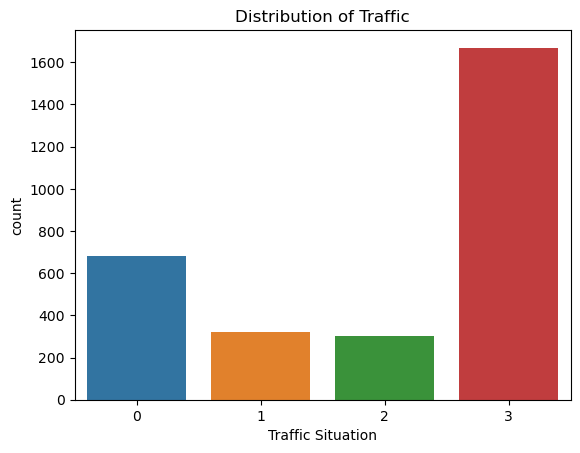

In [71]:
# Visualize some key features
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic')
plt.show()

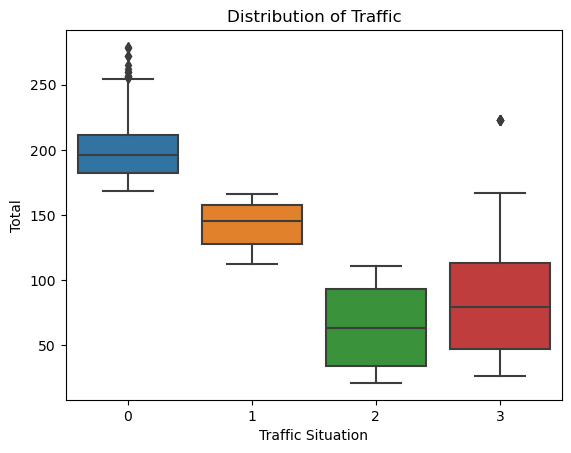

In [72]:
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title('Distribution of Traffic')
plt.show()

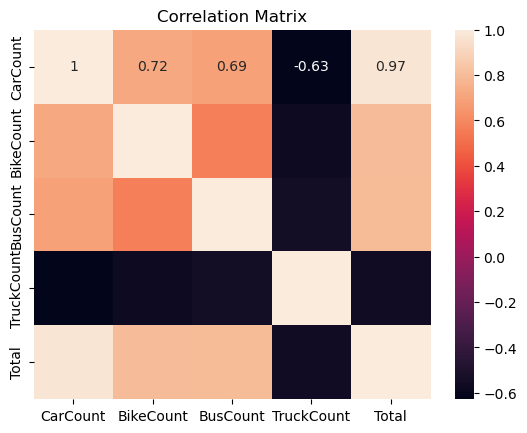

In [73]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting the dataset into training and testing sets
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       127
           1       0.76      0.40      0.52        63
           2       0.52      0.24      0.33        66
           3       0.81      0.89      0.85       340

    accuracy                           0.78       596
   macro avg       0.71      0.62      0.64       596
weighted avg       0.76      0.78      0.76       596

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596

Random Forest Accuracy: 0.99
              precision    recall  f1

In [76]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membuat model Random Forest
RFC= RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
RFC.fit(X_train, y_train)
 # Memprediksi data pengujian
y_pred = RFC.predict(X_test)

In [77]:
from sklearn.svm import SVC
# Train SVC Classifier
svc_model = SVC(kernel='linear', random_state=42)  # Change to SVC
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
# Evaluate models
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Akurasi SVC: {accuracy_svc}')
print("Laporan Klasifikasi SVC:\n", classification_report(y_test, y_pred_svc))

Akurasi SVC: 0.9010067114093959
Laporan Klasifikasi SVC:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       127
           1       0.83      0.78      0.80        63
           2       0.80      0.71      0.75        66
           3       0.91      0.92      0.92       340

    accuracy                           0.90       596
   macro avg       0.87      0.85      0.86       596
weighted avg       0.90      0.90      0.90       596



In [78]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f'Akurasi Decision Tree: {models}')
print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier()}
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [79]:
import numpy as np

input_data = (31,0,4,4,39)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = RFC.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 1):
    print('normal')

if (prediction[0] == 2):
    print('low')
    
if (prediction[0] == 3):
    print('high')
    
if (prediction[0] == 4):
    print('heavy')

[2]
low


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
import pickle

In [81]:
filename = "model.sav"
pickle.dump(svc_model,open(filename,'wb'))

In [83]:
import numpy as np
import pandas as pd
import streamlit as st
import sklearn
import pip

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Streamlit version:", st.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pip version:", pip.__version__)


NumPy version: 1.26.4
Pandas version: 2.1.4
Streamlit version: 1.30.0
Scikit-learn version: 1.2.2
Pip version: 23.3.1
